<Unit 5 | Assignment - The Power of Plots>
1. 
Urban cities have the lowest average fare with the highest number of rides. On the other hand, rural cities's result is the opoosite. 

2. 
Even though rural drivers are only 2.6% of total drivers, they got 6.8% of total fares. Thus each rural driver earned more on average.

3. 
% of total rides by city type relates to the total fare for all 3 types. That means if pyber increases the number of rural drivers then they should increase total fares.

From the above results, it can be concluded that there should be more rural drivers.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load 
city_data_to_load = "resources/city_data.csv"
ride_data_to_load = "resources/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("resources/city_data.csv")
ride_data = pd.read_csv("resources/ride_data.csv")

In [3]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
pyber_data = pd.merge(ride_data, city_data, on="city", how="left")
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data 

In [6]:
# Obtain the x and y coordinates for each of the three city types
urbanType_city = pyber_data[pyber_data["type"] == "Urban"].groupby([pyber_data["city"]])
suburbanType_city = pyber_data[pyber_data["type"] == "Suburban"].groupby([pyber_data["city"]])
ruralType_city = pyber_data[pyber_data["type"] == "Rural"].groupby([pyber_data["city"]])

In [7]:
# Urban calculation of total number of rides per citry(x), average fare(y) 
# and driver count per city(s) 
x_urban = urbanType_city["ride_id"].count()
y_urban = urbanType_city["fare"].mean()
s_urban = urbanType_city["driver_count"].mean()
# s_urban = urbanType_city["driver_count"].count()

# Suburban calculation of total number of rides per citry(x), average fare(y) 
# and driver count per city(s) 
x_suburban = suburbanType_city["ride_id"].count()
y_suburban = suburbanType_city["fare"].mean()
s_suburban = suburbanType_city["driver_count"].mean()

# Rural calculation of total number of rides per citry(x), average fare(y) 
# and driver count per city(s) 
x_rural = ruralType_city["ride_id"].count()
y_rural = ruralType_city["fare"].mean()
s_rural = ruralType_city["driver_count"].mean()

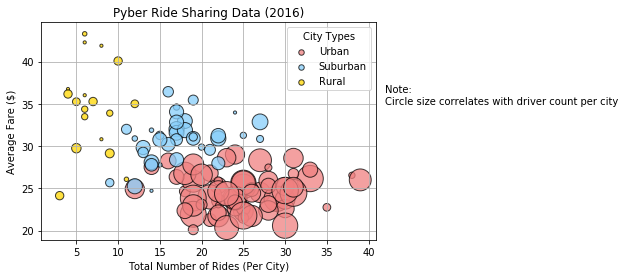

In [8]:
# Build the scatter plots for each city types
#Memo: Since it's too small and hard to see the circles, circle size(s) * 10
#Memo: (colors) https://xkcd.com/color/rgb/  https://matplotlib.org/users/colors.html
plt.scatter(x_urban, y_urban, marker="o", facecolors="LightCoral", edgecolors="black", 
            s=s_urban * 10, alpha=0.75, label="Urban")
plt.scatter(x_suburban, y_suburban, marker="o", facecolors="lightskyblue", edgecolors="black", 
            s=s_suburban * 10, alpha=0.75, label="Suburban")
plt.scatter(x_rural, y_rural, marker="o", facecolors="gold", edgecolors="black", 
            s=s_rural * 10, alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(title="City Types", fontsize=10, loc="best")

# Adjust the legend's circle size
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city", fontsize=10)

# Save Figure
# Memo: bbox_inches = 'tight' : try to figure out the tight bbox of the figure.
plt.savefig("Images/PyberRideSharingData_Scatter.png",bbox_inches="tight")
plt.show()

## Total Fares by City Type 

In [9]:
# groupby('type') Rural, Suburban and Urban
groupType = pyber_data.groupby('type')

# Calculate Type Percents
sumFare = groupType['fare'].sum()
sumFare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

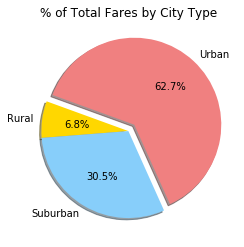

In [10]:
# Build Pie Chart
# Memo: autopct="%1.1f%%"  構成割合を%で表示
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "LightCoral"]
explode = (0, 0, 0.1)
plt.pie(sumFare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/TotalFaresbyCityType_pie.png",bbox_inches="tight")
plt.show()

## Total Rides by City Type 

In [11]:
# Calculate Ride Percents
totalRide = groupType['ride_id'].count()
totalRide

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

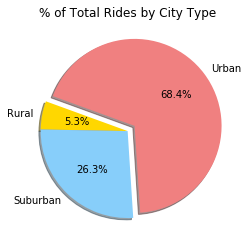

In [12]:
# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "LightCoral"]
explode = (0, 0, 0.1)
plt.pie(totalRide, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/TotalRidesbyCityType_pie.png",bbox_inches="tight")
plt.show()

## Total Drivers by City Type 

In [13]:
# Calculate Driver Percents
#Memo: Use 'city_data' since 'pyber_data' is left join merge of 'city_data' and 'ride_data'
groupType_cityData = city_data.groupby("type")
totalDriver = groupType_cityData["driver_count"].sum()
totalDriver

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

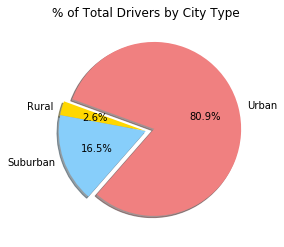

In [14]:
# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "LightCoral"]
explode = (0, 0, 0.1)
plt.pie(totalDriver, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", 
        shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/TotalDriversbyCityType_pie.png",bbox_inches="tight")
plt.show()